# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [3]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [4]:
# Import du dataframe "data.csv"
data_path= "./data.csv"
df =pd.read_csv(data_path,decimal=',') ## afin d'interpréter le décimale dans la variable Experience
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    9565 non-null   object 
 1   Metier        9563 non-null   object 
 2   Technologies  9582 non-null   object 
 3   Diplome       9582 non-null   object 
 4   Experience    9488 non-null   float64
 5   Ville         9582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


In [4]:
df.describe()

,Experience
count,9488.000000
mean,2.814186
std,2.716293
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


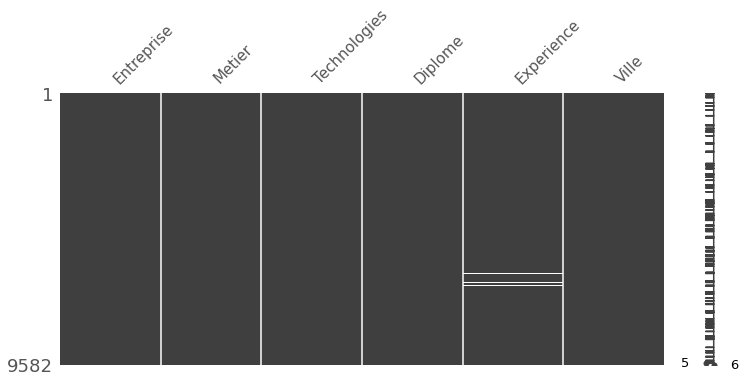

In [16]:
import missingno
missingno.matrix(df,figsize=(12,5), fontsize=15);

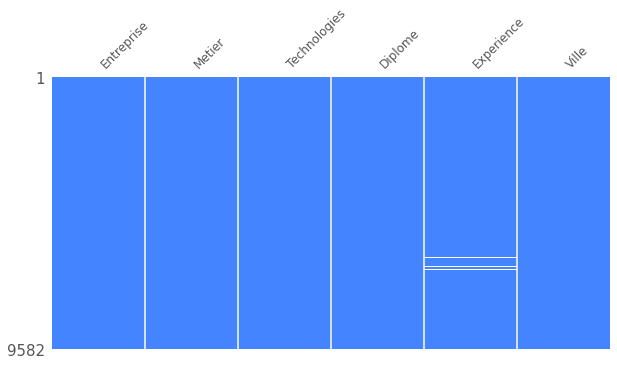

In [11]:
missingno.matrix(df, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [6]:
df.shape

(9582, 6)

In [8]:
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

Nous disposons de 9582 observations dans ce dataset et comme montrer en haut il y a des valeurs manquantes.

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [8]:
df.Metier.unique() ## afin de connaitre comment s'écrivent les valeurs de la colonne "Metier"

array(['Data scientist', 'Data architecte', 'Lead data scientist',
       'Data engineer', nan], dtype=object)

In [9]:
# récupération des données souhaitées
data_scientist=df[df.Metier=='Data scientist']['Experience']
data_engineer=df[df.Metier=='Data engineer']['Experience']

## calcul de la médiane et de la moyenne
median_data_scientist=data_scientist.median()
mean_data_engineer=data_engineer.mean()

## conditions pour le changement de valeurs
condition_data_scientist=np.logical_and(df.Metier=='Data scientist' ,
                                        df.Experience.isnull())
condition_data_engineer=np.logical_and(df.Metier=='Data engineer' ,
                                       df.Experience.isnull())

## changement de valeurs dans le dataphrame df
df.loc[condition_data_scientist, 'Experience'] = median_data_scientist
df.loc[condition_data_engineer, 'Experience'] = mean_data_engineer

In [10]:
df.isnull().sum() ## on remarque que le nombre de valeur nulls a diminué de 94 à 42

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

* On peut bien remarquer que le nombre de valeurs manquantes dans la colonne Experience à diminuer de 94 à 42.

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [11]:
moy_data_scientist=df[df.Metier=='Data scientist']['Experience'].mean()
moy_lead_data_scientist=df[df.Metier=='Data engineer']['Experience'].mean()
moy_data_engineer=df[df.Metier=='Lead data scientist']['Experience'].mean()

In [12]:
print(f"En moyenne les data scientist ont {moy_data_scientist:.3f} années d'éxpériences")
print(f"En moyenne les lead data scientist ont {moy_lead_data_scientist:.3f} années d'éxpériences")
print(f"En moyenne les data engineer ont {moy_data_engineer:.3f} années d'éxpériences")

En moyenne les data scientist ont 2.241 années d'éxpériences
En moyenne les lead data scientist ont 2.985 années d'éxpériences
En moyenne les data engineer ont 3.965 années d'éxpériences


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

* On va tracer les boxplot des trois profils afin de comparer la distribution de la variable Experience pour chaque profil

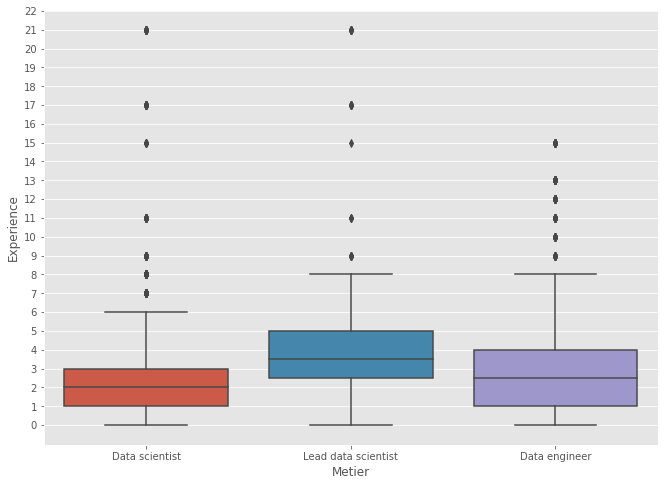

In [13]:
df1=df[df["Metier"] != "Data architecte"]

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sb.boxplot(x=df1['Metier'], y=df1['Experience'])
ax.set_yticks(range(0,23))
plt.show()

On remarque que :
    * Les lead Data scientist ont plus d'expérience ce qui est attendu. 
    * Quand le nombre de Data scientist diminue le nombre de Lead  data scientist commence à augmenter.


### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

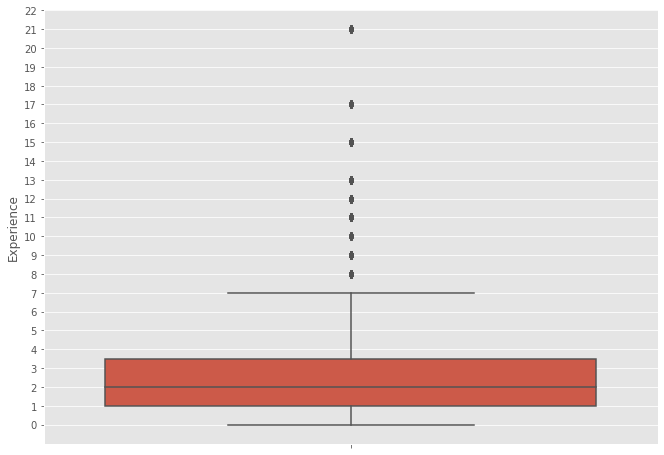

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sb.boxplot(y=df['Experience'])
ax.set_yticks(range(0,23))
plt.show()

En analysant les graphes de la question précedante et le graphe ci-dessus, on peut choisir quatres catégories selon l'expérience comme suit :
* Débutant (une année) : le premier quartile de l'ensemble des profils commence à une année expérience, donc c'est là où l'entreprise commence à avoir un nombre important de ces profils.
* Confirmé(1 -> 2,5) : à 2,5 d'expériences les profils data scientist commencent à monter en grade pour avoir des postes de lead data scientist et puisque la médiane des lead data scientist est 3,5 donc à 3,5 l'écrasante majorité des data scientist sont des lead data scientist
* Avancé(2,5 -> 7): La plage des Lead data scientist et la moitié des data engineer et avant les outliers
* Expert (>=7): se sont les outliers, c'est les points en haut du moustache de la baoite à moustache de tout les profils

In [15]:
df = df.fillna(df.mean()) # on remplit le reste des valuers manquantes par la moyenne

# création de la liste des conditions
conditions = [
    (df['Experience'] <= 1),
    (df['Experience'] > 1) & (df['Experience'] <= 2.5),
    (df['Experience'] > 2.5) & (df['Experience'] <= 7),
    (df['Experience'] > 7)
    ]

# création  de la liste des modalités selon chaque condition 
values = ['Debutant', 'Confirme', 'Avance', 'Expert']

# création de la nouvelle colonne avec np.select 
df['Exp_label'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Debutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Avance
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Avance
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Confirme
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,Confirme


In [16]:
df['Exp_label'].unique()

array(['Debutant', 'Avance', 'Confirme', 'Expert'], dtype=object)

In [17]:
df = df.drop("Experience", axis=1) ## on peut se débarasser du variable expérience dans la suite

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

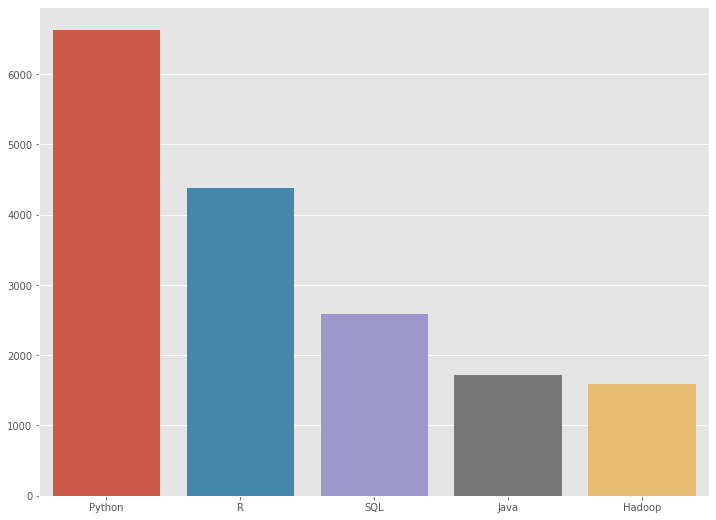

In [18]:
tech_counts = df["Technologies"].str.split('/', expand=True).stack().value_counts()

plt.figure(figsize=(12, 9))

sb.barplot(x=tech_counts.index,
           y=tech_counts.values,
           order=tech_counts.index[:5])

ax.set(xlabel='Technologie', ylabel='Count')

plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

La variable principale est ici "Technologies". Nous utilisons one-hot-encoding pour modéliser cette variable, c'est-à-dire que pour chaque profil nous définissons un vecteur binaire de 62 entrées (#Technologies), une entrée est égale à 1, si la technologie correspondante est utilisée par le profil.

In [19]:
df = df.assign(**dict.fromkeys(tech_counts.index, 0))

for ii, row in df.iterrows():
    for tech in row["Technologies"].split("/"):
        df.at[ii, tech] = 1

df = df.drop("Technologies", axis=1)

Dans ce clustering, on n'utilise pas le nom de l'entreprise et on n'utilise pas la variable du titre du poste (puisque le but de la question suivante est de le prédire, (j'imagine que nous ne voulons pas l'utiliser ici).

In [20]:
companies = df["Entreprise"]
job_title = df["Metier"]

df = df.drop(["Entreprise", "Metier"], axis=1)

In [21]:
X = pd.get_dummies(df)

In [22]:
X

,Python,R,SQL,Java,Hadoop,Excel,C++,Spark,Linux,MongoDB,...,Ville_Paris,Ville_Rennes,Ville_Rouen,Ville_Strasbourg,Ville_Toulon,Ville_Toulouse,Exp_label_Avance,Exp_label_Confirme,Exp_label_Debutant,Exp_label_Expert
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9578,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9579,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9580,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


Il reste à appliquer le Kmeans

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)

kmeans.score(X)

-50139.7095429312

Voyons s'il y a une relation entre le cluster et le "Job Title". En fait, on attend à ce que deux groupes apparaissent, le premier contenant des Data scientist et le Lead data scientist (utilisant principalement Sklearn, machine learning) et le second avec des Data architecte et l'ingénieur de données (utilisant principalement Docker, MongoDB). On va voir combien de fois l'étiquette du cluster correspond à ces deux classes. Notez que le résultat de clustering doit être vu avec une perumation, puisqu'il attribue 1 et 0 arbitrairement à chaque cluster. Ainsi, l'exactitude de la classification est le maximum entre le score et le (score - 1).

In [24]:
from sklearn.metrics import accuracy_score

group_1 = (job_title == "Data architecte") | (job_title == "Data engineer")

group_2 = (job_title == "Lead data Scientist") | (job_title == "Data scientist")


print(max(accuracy_score(group_1 , kmeans.labels_), 
          1- accuracy_score(group_1 , kmeans.labels_)))


print(max(accuracy_score(group_2 , kmeans.labels_), 
          1- accuracy_score(group_2 , kmeans.labels_)))


0.9225631392193696
0.8222709246503861


### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

Les variables utilisées dans la question précédente peuvent être réutilisées ici

Nous obtenons d'abord le jeu de test (échantillons sans label), puis nous divisons le jeu de données d'entrainement en val et **train** et nous codons le label (titre du poste)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train = X[~job_title.isna()]
X_test = X[job_title.isna()]

y_train = job_title[~job_title.isna()]

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1) 

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=25, 
                             n_estimators=100,
                             min_samples_split=6)

clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

0.925517081106205
0.8631138975966562


In [28]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(max_depth=30,
                             n_estimators=250,
                             min_samples_split=4)

param_grid = [{'max_depth':[5,15,20,30,35],
               'min_samples_split':[2,3,4],
               'n_estimators':[100,150,250,300]
              }]
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_result = grid_search.fit(X_train, y_train)

In [29]:
grid_result.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

In [30]:
RFbest=grid_result.best_estimator_
print(RFbest.score(X_train, y_train))
print(RFbest.score(X_val, y_val))

0.9171508250058099
0.8704284221525601


In [31]:
feature_importance = RFbest.feature_importances_
print(feature_importance) ## On remarque que 'R' est la variables la plus importante 

[0.03619175 0.18500105 0.02826829 0.02306316 0.02070277 0.02296035
 0.02035305 0.02150659 0.04056887 0.03023579 0.0124163  0.01790365
 0.00606951 0.02077192 0.0238577  0.02259183 0.01666292 0.01550437
 0.00447529 0.01422256 0.01792927 0.04415323 0.03680333 0.00185911
 0.00352252 0.00409603 0.00176965 0.00185805 0.0114835  0.02278138
 0.00208184 0.00773698 0.02681906 0.00868326 0.01261585 0.00361154
 0.0009475  0.00914941 0.00136941 0.00963968 0.00066062 0.00128216
 0.00848805 0.00272165 0.00114109 0.00777478 0.00710252 0.00399869
 0.0036344  0.0040886  0.0007547  0.00027894 0.00159363 0.00641992
 0.0030062  0.00364519 0.00408027 0.00335622 0.00678747 0.00312836
 0.00122117 0.00508841 0.00567998 0.00337038 0.01014258 0.00287476
 0.00077801 0.00336379 0.00388499 0.00403781 0.00077128 0.00292034
 0.00187889 0.00357176 0.00255753 0.00174546 0.00197714 0.00154396
 0.00338451 0.02407927 0.00807505 0.01515388 0.00571729]
